In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj
from scipy.stats import gaussian_kde

In [2]:
def plot_ramachandran_contour(traj, num, phi_atoms=None, psi_atoms=None, bins=100):
    """Generate a Ramachandran plot with a contour heatmap.

    Parameters
    ----------
    traj : mdtraj.Trajectory
        An MDTraj trajectory object.
    num : str
        Figure name or identifier.
    phi_atoms : list, optional
        List of atom names to define the phi angle.
    psi_atoms : list, optional
        List of atom names to define the psi angle.
    bins : int, optional
        Number of bins for contour density estimation (default: 100).
    """

    # Compute phi and psi angles
    if phi_atoms is None:
        phis = mdtraj.compute_phi(traj)[1].ravel()
    else:
        phis = mdtraj.compute_dihedrals(
            traj, mdtraj.geometry.dihedral._atom_sequence(traj.topology, phi_atoms)[1]
        )

    if psi_atoms is None:
        psis = mdtraj.compute_psi(traj)[1].ravel()
    else:
        psis = mdtraj.compute_dihedrals(
            traj, mdtraj.geometry.dihedral._atom_sequence(traj.topology, psi_atoms)[1]
        )

    # Convert to degrees
    phis = phis * 180 / np.pi
    psis = psis * 180 / np.pi

    # Compute kernel density estimate (KDE)
    values = np.vstack([phis, psis])
    kde = gaussian_kde(values)(values)

    # Create contour plot
    plt.close(num)
    fig, ax = plt.subplots(figsize=(7, 5))
    sc = ax.scatter(phis, psis, c=kde, cmap="viridis", s=5)
    ax.axvline(0, color="k", linestyle="--", lw=1)
    ax.axhline(0, color="k", linestyle="--", lw=1)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-180, 180)
    ax.set_xticks(np.linspace(-180, 180, 5))
    ax.set_yticks(np.linspace(-180, 180, 5))
    ax.set_xlabel("Phi (°)")
    ax.set_ylabel("Psi (°)")
    ax.set_title(num)
    # ax.set_title("Ramachandran Plot (Contour Density)")
    fig.colorbar(sc, label="Density")

    plt.show()
    return phis, psis

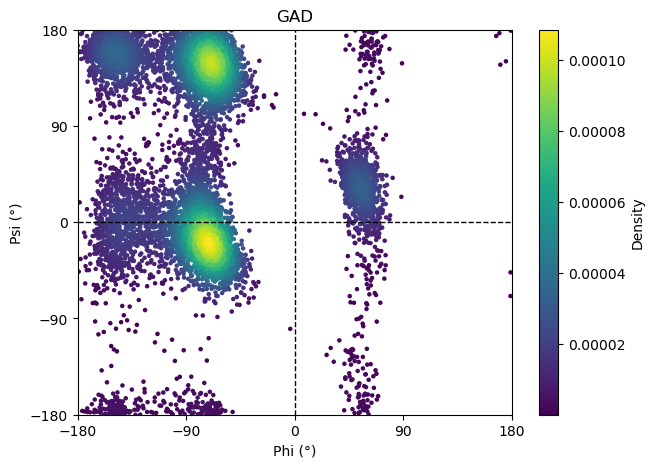

In [4]:
cwd = "/Users/arminsh/Documents/GADES/examples/ADP_NumHess/"
traj = mdtraj.load(cwd+"traj.dcd", top=cwd+"equilibrated.pdb")
data = plot_ramachandran_contour(traj, 'GAD')

In [5]:
from sklearn.cluster import DBSCAN

# 2D toy data
points = np.vstack(data).T

# DBSCAN with eps = 0.1 and min_samples = 5
model = DBSCAN(eps=10, min_samples=50)
labels = model.fit_predict(points)


Text(0, 0.5, 'Psi (°)')

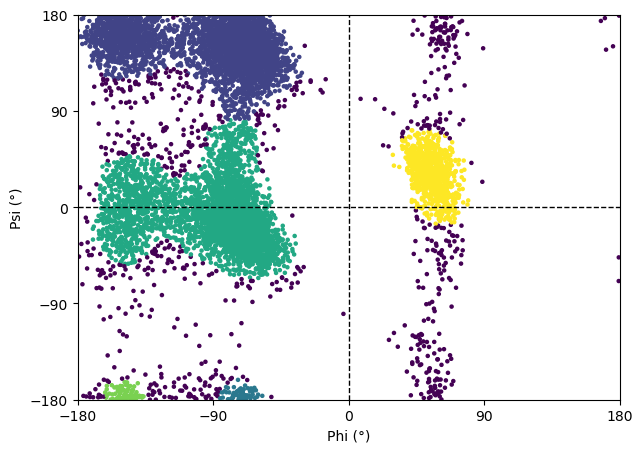

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
sc = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap="viridis", s=5)
ax.axvline(0, color="k", linestyle="--", lw=1)
ax.axhline(0, color="k", linestyle="--", lw=1)
ax.set_xlim(-180, 180)
ax.set_ylim(-180, 180)
ax.set_xticks(np.linspace(-180, 180, 5))
ax.set_yticks(np.linspace(-180, 180, 5))
ax.set_xlabel("Phi (°)")
ax.set_ylabel("Psi (°)")